## Part 2: Confidence Intervals; Estimating the True Mean Height (16 points)

5. (8 points) Simulate the construction of confidence intervals for different sample sizes and confidence
levels. Vary nin[10, 500, step=10] and αin[0.01, 0.2step=0.01] dynamically and observe how
the confidence interval width changes

we are done


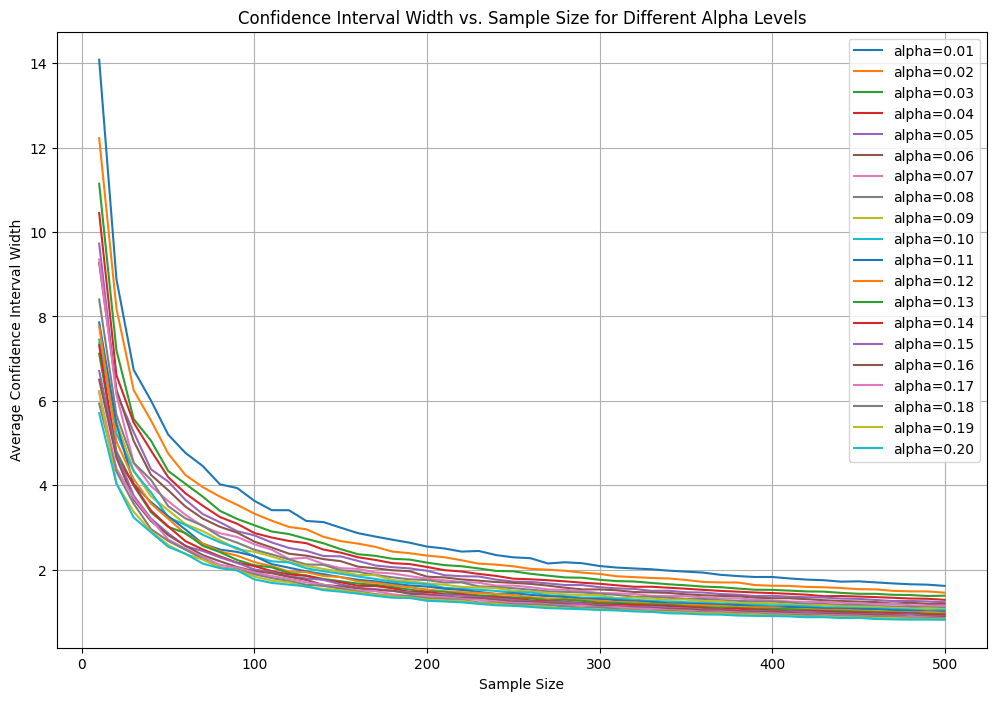

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Parameters
sample_sizes = np.arange(10, 501, 10)
alpha_values = np.arange(0.01, 0.21, 0.01)
true_mean = 176
true_std = 7
num_simulations = 30

# Function to calculate confidence interval width
def confidence_interval_width(n, alpha):
    sample_means = []
    for _ in range(num_simulations):
        sample = np.random.normal(true_mean, true_std, n)
        sample_mean = np.mean(sample)
        sample_std = np.std(sample, ddof=1)
        ci = stats.t.interval(1 - alpha, n - 1, loc=sample_mean, scale=sample_std / np.sqrt(n))
        sample_means.append(ci[1] - ci[0])
    return np.mean(sample_means)

# Simulate and store results
results = np.zeros((len(sample_sizes), len(alpha_values)))
for i, n in enumerate(sample_sizes):
    for j, alpha in enumerate(alpha_values):
        results[i, j] = confidence_interval_width(n, alpha)
print("we are done")
# Plotting
plt.figure(figsize=(12, 8))
for j, alpha in enumerate(alpha_values):
    plt.plot(sample_sizes, results[:, j], label=f'alpha={alpha:.2f}')
plt.xlabel('Sample Size')
plt.ylabel('Average Confidence Interval Width')
plt.title('Confidence Interval Width vs. Sample Size for Different Alpha Levels')
plt.legend()
plt.grid(True)
plt.show()